In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data_capture_1.csv')

In [6]:
df.head(20)

,PosX,PosY,RSSI,Name
0,1.921138,4.59375,-54,egopi3
1,1.921138,4.59375,-74,egopi2
2,1.921138,4.59375,-55,egopi3
3,1.921138,4.59375,-73,egopi2
4,1.921138,4.59375,-56,egopi3
5,1.921138,4.59375,-77,egopi1
6,1.921138,4.59375,-73,egopi2
7,1.921138,4.59375,-57,egopi3
8,1.921138,4.59375,-79,egopi1
9,1.921138,4.59375,-74,egopi2


In [9]:
df = df[df.Name.str.contains("egopi")]

In [15]:
df = df.drop(["PosX", "PosY"], axis=1)

In [16]:
window = df.loc[0:10]

In [18]:
point = window.groupby("Name").mean()

In [21]:
point.as_matrix().T[0]

array([-78. , -73.5, -56.2])

In [39]:
points = []
for i in range(len(df) - 20):
    window = df.loc[i:i+20]
    point = window.groupby("Name").mean().as_matrix().T[0]
    points.append(point)


In [43]:
newpoints = []
for p in points:
    if p.shape == (3,):
        newpoints.append(p)

In [47]:
data = np.stack(newpoints, axis=0)

In [24]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(n_clusters=4)

In [49]:
km.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [76]:
preds = km.predict(data)

In [58]:
from sklearn.manifold import TSNE

In [59]:
tsne = TSNE()

In [61]:
newdata = tsne.fit_transform(data)

In [68]:
colors = ["red", "green", "blue", "yellow"]

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
c = []
for d in data:
    c.append(colors[km.predict(d)[0]])
    

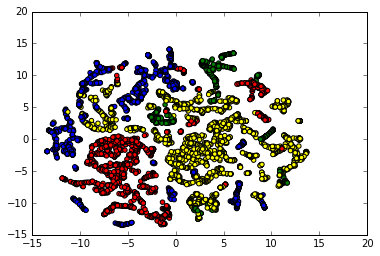

In [75]:
plt.scatter(newdata[:, 0], newdata[:, 1], c=c)